# Pregunta 4

- Los siguientes datos fueron recabados en un experimento que fue diseñado para verificar si existe una diferencia sistemática en los pesos en gramos obtenidos con dos diferentes balanzas:

* BalanzaI:	11.23,	14.36,	8.33,	10.50,	23.42,	9.15,	13.47,	6.47,	12.40,	19.38
* BalanzaII: 11.27,	14.41,	8.35,	10.52,	23.41,	9.17,	13.52,	6.46,	12.45,	19.35

- ¿Existe diferencia significativa entre los pesos obtenidos con las dos balanzas? Use alfa = 0.05

## A.	HIPOTESIS DE INVESTIGACIÓN:

- H0: El peso promedio de cada caja de avena envasada es 500 gramos.
- H1: El peso promedio de cada caja de avena envasada NO es 500 gramos.

## B.	POBLACIONES

- La población es todas las cajas de avena envasada que realiza el productor.

## C.	MUESTRA

- Nivel de confianza = 1 - α = 95% = 0.95
- n = 16

## D.	SIGNIFICANCIA

- Error tipo I = α = 0.05 = 5%

## E.	DATOS

- Peso promedio de cada caja de avena envasada.
- Se adjunta en un arreglo de numpy

In [28]:
# Importación de librerias a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats as ss

In [48]:
# Carga de los datos con numpy
balanza1 = np.array([11.23, 14.36, 8.33, 10.50, 23.42, 9.15, 13.47, 6.47, 12.40, 19.38])
balanza2 = np.array([11.27, 14.41, 8.35, 10.52, 23.41, 9.17, 13.52, 6.46, 12.45, 19.35])
# Tamaño de la muestra
n1 = len(balanza1)
n2 = len(balanza2)
# Significancia
alpha = 0.05


print('Datos recolectados de la balanza1: ', balanza1)
print('Datos recolectados de la balanza2: ', balanza2)

Datos recolectados de la balanza1:  [11.23 14.36  8.33 10.5  23.42  9.15 13.47  6.47 12.4  19.38]
Datos recolectados de la balanza2:  [11.27 14.41  8.35 10.52 23.41  9.17 13.52  6.46 12.45 19.35]


## F.	HIPOTESIS ESTADISTICA

- Asumiendo la distribución de los datos sigue una distribución normal:

- H0:  μ = 500g             H. Nula
- H1:  μ ≠ 500g             H. Alterna

## G. TIPO DE PRUEBA

- Sera de doble cola porque H1 tiene el signo diferente:

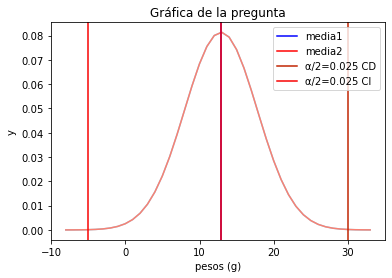

In [46]:
# Gráfica de referencia para las colas
mu1, sigma1 = np.mean(balanza1), np.std(balanza1)
mu2, sigma2 = np.mean(balanza1), np.std(balanza1)

X = ss.norm(mu1, sigma1)
Y = ss.norm(mu2, sigma2)

graph1 = np.arange(X.ppf(0.00001), X.ppf(0.99999))
graph2 = np.arange(Y.ppf(0.00001), Y.ppf(0.99999))

plt.plot(graph1, X.pdf(graph1), c='skyblue')
plt.plot(graph2, Y.pdf(graph2), c='salmon')

tail_left = int(graph1.size * 0.05) + 1
tail_right = int(graph1.size * 0.95) - 1

plt.axvline(mu1, c='blue', label='media1')
plt.axvline(mu2, c='red', label='media2')
plt.axvline(graph1[tail_right], c='#c02200', label='α/2=0.025 CD')
plt.axvline(graph1[tail_left], c='#f80000', label='α/2=0.025 CI')

plt.title('Gráfica de la pregunta')
plt.ylabel('y')
plt.xlabel('pesos (g)')

plt.legend()

## H.	ESTADISTICO DE PRUEBA

- No se conoce la desviación típica poblacional, por lo tanto, mi estadístico es:

- Formula: $$t = {{(x_1 ̅ - x_2 ̅) - (\mu_1 - \mu_2)} \over { \sqrt { {s_1^2 \over n_1} + { s_2^2 \over n_2 } } }}$$

In [31]:
def test_t(x1, x2, std1, std2, n1, n2):
    
    return ((x1 - x2) - 0) / np.sqrt(std1 ** 2 / n1 + std2 ** 2 / n2)

In [56]:
def s_p(n1, n2, s1, s2):
    
    return ((n1 - 1) * s1 ** 2 + (n2 - 1) * s2 ** 2) / n1 + n2 - 2

In [59]:
def test_t_2(x1, x2, s1, s2, n1, n2):
    
    sp = s_p(n1, n2, s1, s2)
    
    return ((x1 - x2) - 0) / np.sqrt(sp / n1 + sp / n2)

In [32]:
data1 = {
    'balanza1': balanza1
}

data2 = {
    'balanza2': balanza2
}

data1 = pd.DataFrame(data1)
data2 = pd.DataFrame(data2)

print(data1.describe())

print(data2.describe())

       balanza1
count  10.00000
mean   12.87100
std     5.16613
min     6.47000
25%     9.48750
50%    11.81500
75%    14.13750
max    23.42000
        balanza2
count  10.000000
mean   12.891000
std     5.156863
min     6.460000
25%     9.507500
50%    11.860000
75%    14.187500
max    23.410000


In [60]:
# Calcular el "t" si no se conoce la desviación típica poblacional
x1 = float(data1.mean())
x2 = float(data2.mean())

std1 = float(data1.std())
std2 = float(data2.std())

n1 = len(data1)
n2 = len(data2)

t_2 = test_t_2(x1, x2, std1, std2, n1, n2)
t = test_t(x1, x2, std1, std2, n1, n2)
print('El estadistico de prueba "t1" es:', t)
print('El estadistico de prueba "t2" es:', t_2)

El estadistico de prueba "t1" es: -0.008664414135844647
El estadistico de prueba "t2" es: -0.005978603427961839


In [61]:
# calculamos el p-valor por el t de prueba
p_value = ss.t.sf(np.abs(t_2), n1 - 1) * 2
print('El p-valor es: ', p_value)

El p-valor es:  0.9953602170389534


In [55]:
td, p_valued = ss.ttest_rel(balanza1, balanza2)

print('El estadistico de prueba "t" es:', np.mean(td))
print('El p-valor es: ', np.mean(p_valued))

El estadistico de prueba "t" es: -2.205643866281438
El p-valor es:  0.05483350919895083


### Podemos respaldar nuestros datos con megaStat de Excel

## J.	CONCLUSIÓN

- p-value > alpha
- 0.05205 > 0.05000 (Verdadero) No rechazo la Ho

- No hay suficiente evidencia en las muestras para no rechazar la hipotesis nula de que el peso promedio de las cajas de avena envasadas es de 500 gramos. A un nivel de confianza de 95%.
